In [3]:
from gibbs.dataclass import GibbsResult
import matplotlib.pyplot as plt
import numpy as np
from gibbs.learning.klocal_pauli_basis import KLocalPauliBasis
%load_ext autoreload
%autoreload 2

/home/drudis/python_environements/test_easy_instalation/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


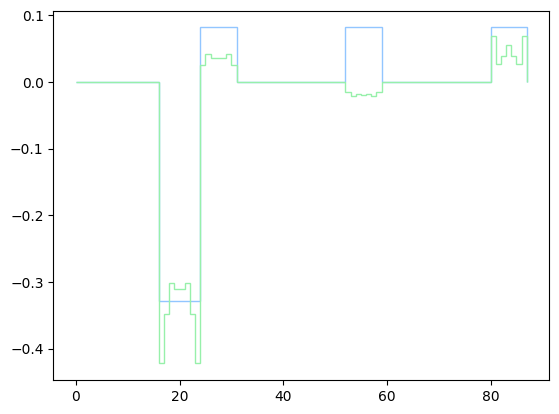

In [7]:
result_nocfield = GibbsResult.load("saved_simulations/turbo/_date=20.01.2023_14:51:09.npy")
# result_cfield = GibbsResult.load("saved_simulations/turbo/qiskit_testing/cfield=['0.25', 'IZII']_date=24.01.2023_09:58:06.npy")
# result_nocfield.coriginal - result_cfield.coriginal/result_cfield.betas[-1]
plt.stairs(result_nocfield.coriginal)
plt.stairs(result_nocfield.cfaulties[-1])

In [8]:
result_nocfield.animated_hamiltonian(250,np.real)

In [2]:
result_cfield.animated_hamiltonian(250,np.real)

NameError: name 'result_cfield' is not defined

In [ ]:
from gibbs.learning.hamiltonian_learning import HamiltonianLearning
from gibbs.preparation.varqite import efficientTwoLocalansatz
print(result_nocfield.ansatz_arguments)
state_nocfield = efficientTwoLocalansatz(**result_nocfield.ansatz_arguments)[0]
hl_nocfield = HamiltonianLearning(state_nocfield,2,4,result_nocfield.parameters)
state_cfield = efficientTwoLocalansatz(**result_cfield.ansatz_arguments)[0]
hl_cfield = HamiltonianLearning(state_cfield,2,4,result_cfield.parameters)

In [ ]:
hl_nocfield.sample_paulis()
hl_nocfield.create_constraint_matrix()
nofield_constraint = hl_nocfield.constraint_matrix

hl_cfield.sample_paulis()
hl_cfield.create_constraint_matrix()
cfield_constraint = hl_cfield.constraint_matrix


In [ ]:
#Now we need to construct a constraint matrix with the other 2
from scipy.sparse import bmat
from numpy.linalg import eigh
from scipy.sparse.linalg import eigsh

A = bmat([[nofield_constraint,None],
          [cfield_constraint,cfield_constraint]])
ATA = A.T.conj() @ A

# sings,vecs = eigh(ATA.todense())
sings,vecs = eigsh(ATA,k=10,which="SM")


print(sings)

#What we should do is use the MAP with this two matrices we have found.

In [ ]:
total_error_nofield = np.array(result_nocfield.cfaulties) - np.array(result_nocfield.coriginal)
total_error_nofield = np.linalg.norm(total_error_nofield,axis=1)/total_error_nofield.shape[1]



plt.plot(result_nocfield.betas[1:],total_error_nofield[1:])
plt.plot(result_cfield.betas[1:],field_error[1:])

In [ ]:
cfield = KLocalPauliBasis(result_cfield.klocality,result_cfield.num_qubits).pauli_to_num("ZIII")
cfield = np.array(result_cfield.cfaulties)[1:,cfield]

oterm = KLocalPauliBasis(result_cfield.klocality,result_cfield.num_qubits).pauli_to_num("IXXI")
oterm = np.array(result_cfield.cfaulties)[1:,oterm]

plt.plot(result_cfield.betas[1:],cfield,marker="o",linestyle="None")
plt.plot(result_cfield.betas[1:],oterm,marker="x")

In [ ]:
init_field = KLocalPauliBasis(result_cfield.klocality,result_cfield.num_qubits).pauli_to_num("ZIII")
end_field = KLocalPauliBasis(result_cfield.klocality,result_cfield.num_qubits).pauli_to_num("IIIZ")
